In [193]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import datetime as dt
%matplotlib inline
from matplotlib.pyplot import figure
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
import pandas_datareader as pdr
import datetime as dt
from keras.layers import Embedding, SimpleRNN

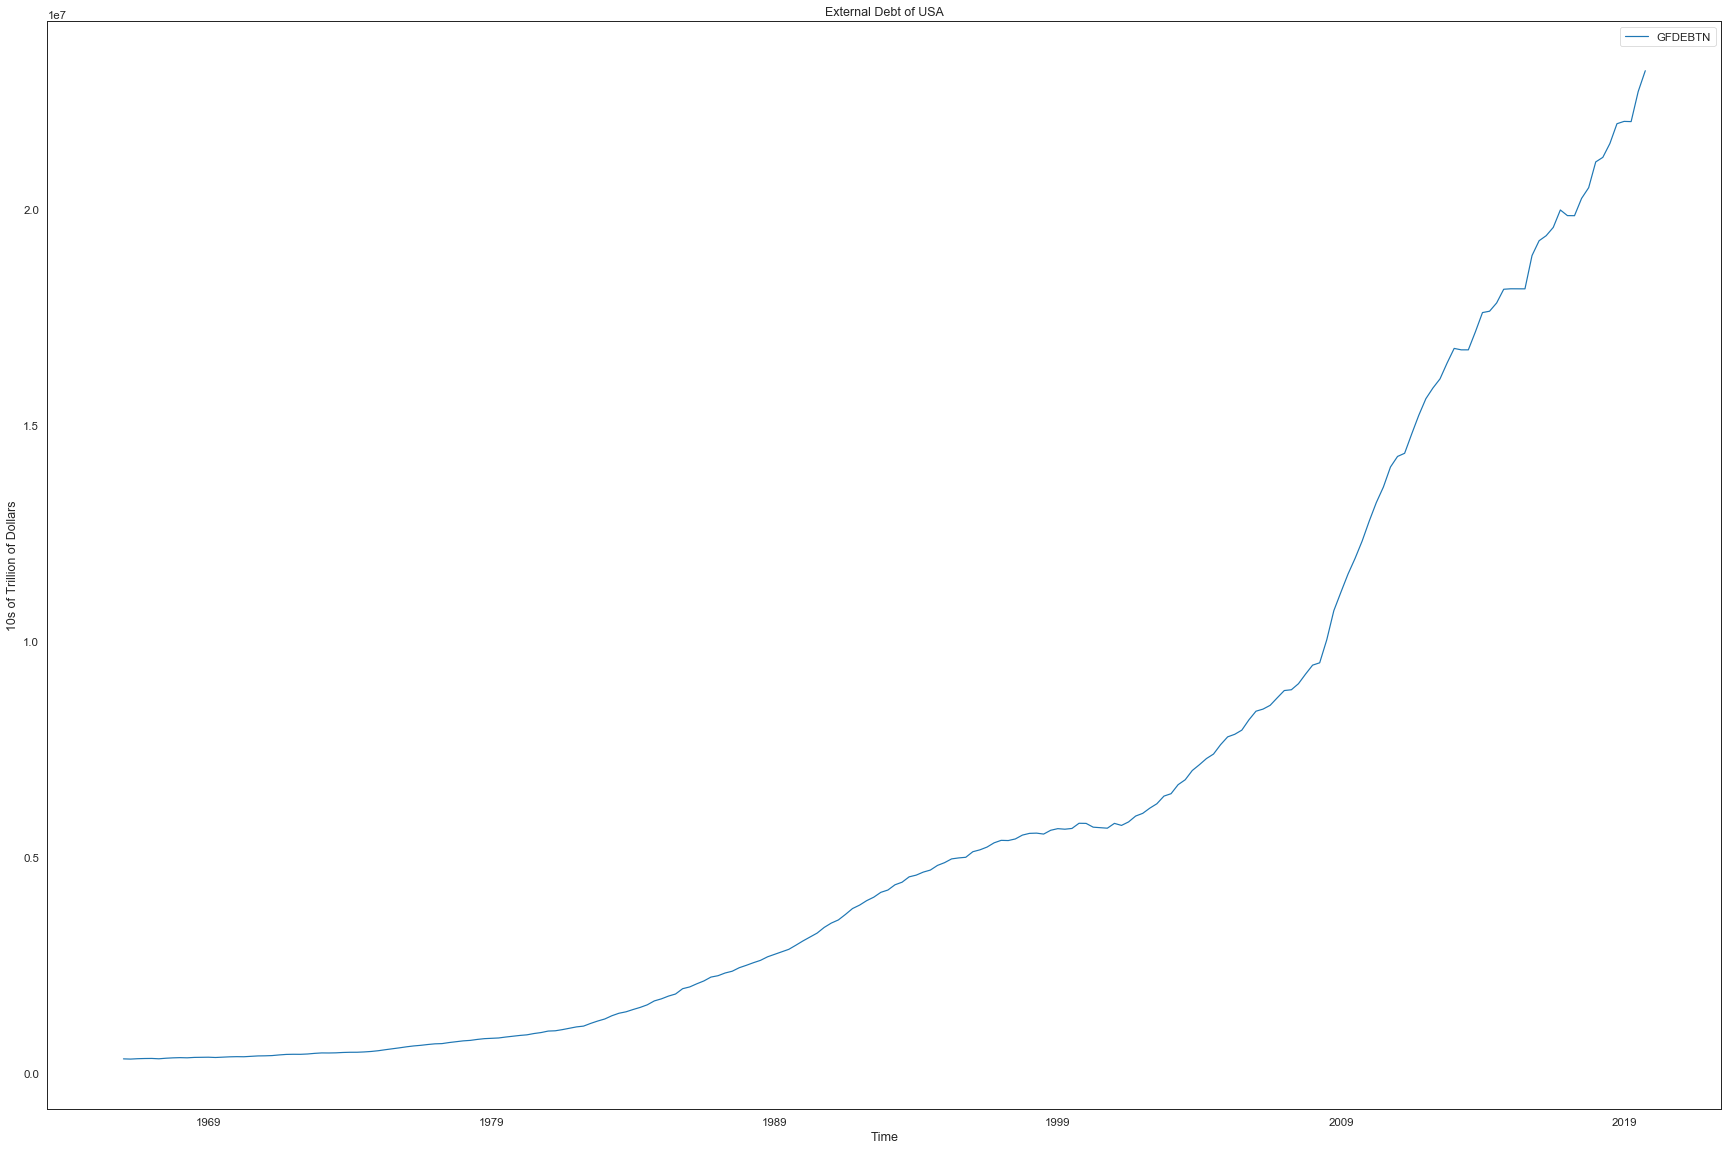

In [194]:
s = dt.datetime(1966, 1,1)
e = dt.datetime(2019,12,31)

data = pdr.DataReader('GFDEBTN', 'fred', s, e) 

data.plot(figsize = (30,20))
plt.title('External Debt of USA')
plt.xlabel('Time')
plt.ylabel('10s of Trillion of Dollars')
plt.rcParams.update({'font.size': 30})

In [195]:
data = data.apply(lambda x: np.log(x) - np.log(x.shift(1))).dropna()
print(data.head())

            GFDEBTN
DATE               
1966-04-01  -0.0154
1966-07-01   0.0270
1966-10-01   0.0140
1967-01-01   0.0049
1967-04-01  -0.0246


In [240]:
train_size = int(len(data) * 0.70)
test_size = len(data) - train_size
train, test = data.iloc[0:train_size], data.iloc[train_size:len(data)]


print(len(train), len(test))

150 65


In [241]:
### converting to tensor arrays 
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [242]:
time_steps = 4

X_train, y_train = create_dataset(train, train.GFDEBTN, time_steps)
X_test, y_test = create_dataset(test, test.GFDEBTN, time_steps)

print(X_train.shape, y_train.shape)

(146, 4, 1) (146,)


In [243]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [244]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]) ),
    keras.layers.Dropout(0.2),
    keras.layers.SimpleRNN(15, return_sequences = True),
    keras.layers.SimpleRNN(1)
])

    
    
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['acc'])

history = model.fit(X_train, y_train, epochs=40, batch_size=90, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 146 samples, validate on 61 samples
Epoch 1/40
146/146 [==============================] - 2s 14ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 3.7167e-04 - val_acc: 0.0000e+00
Epoch 2/40
146/146 [==============================] - 0s 108us/step - loss: 5.5120e-04 - acc: 0.0000e+00 - val_loss: 3.8719e-04 - val_acc: 0.0000e+00
Epoch 3/40
146/146 [==============================] - 0s 115us/step - loss: 5.3815e-04 - acc: 0.0000e+00 - val_loss: 5.3911e-04 - val_acc: 0.0000e+00
Epoch 4/40
146/146 [==============================] - 0s 135us/step - loss: 6.1275e-04 - acc: 0.0000e+00 - val_loss: 4.7692e-04 - val_acc: 0.0000e+00
Epoch 5/40
146/146 [==============================] - 0s 136us/step - loss: 5.7053e-04 - acc: 0.0000e+00 - val_loss: 3.3503e-04 - val_acc: 0.0000e+00
Epoch 6/40
146/146 [==============================] - 0s 154us/step - loss: 4.3599e-04 - acc: 0.0000e+00 - val_loss: 2.6155e-04 - val_acc: 0.0000e+00
Epoch 7/40
146/146 [==============================] - 0s 134

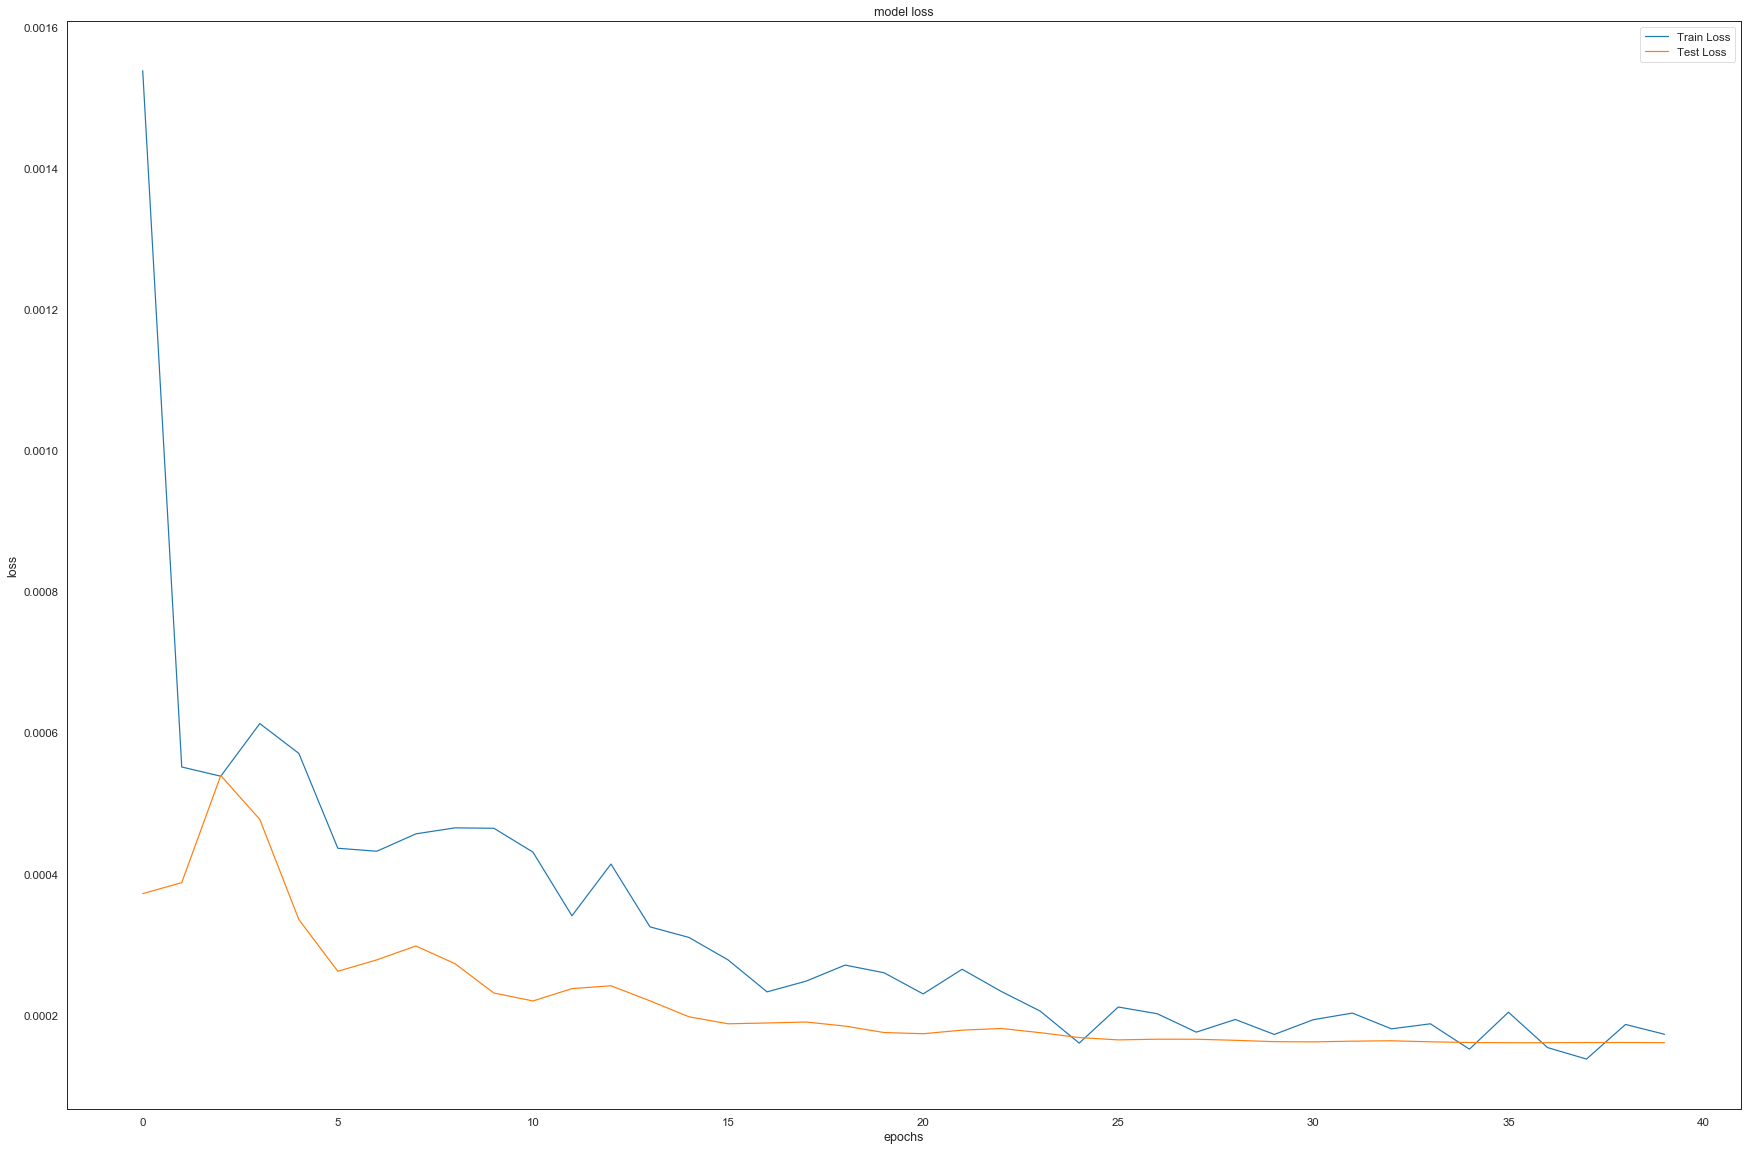

In [245]:
plt.figure(figsize=(30,20))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [246]:
y_pred = model.predict(X_test)
y_pred
print(len(y_pred))

61


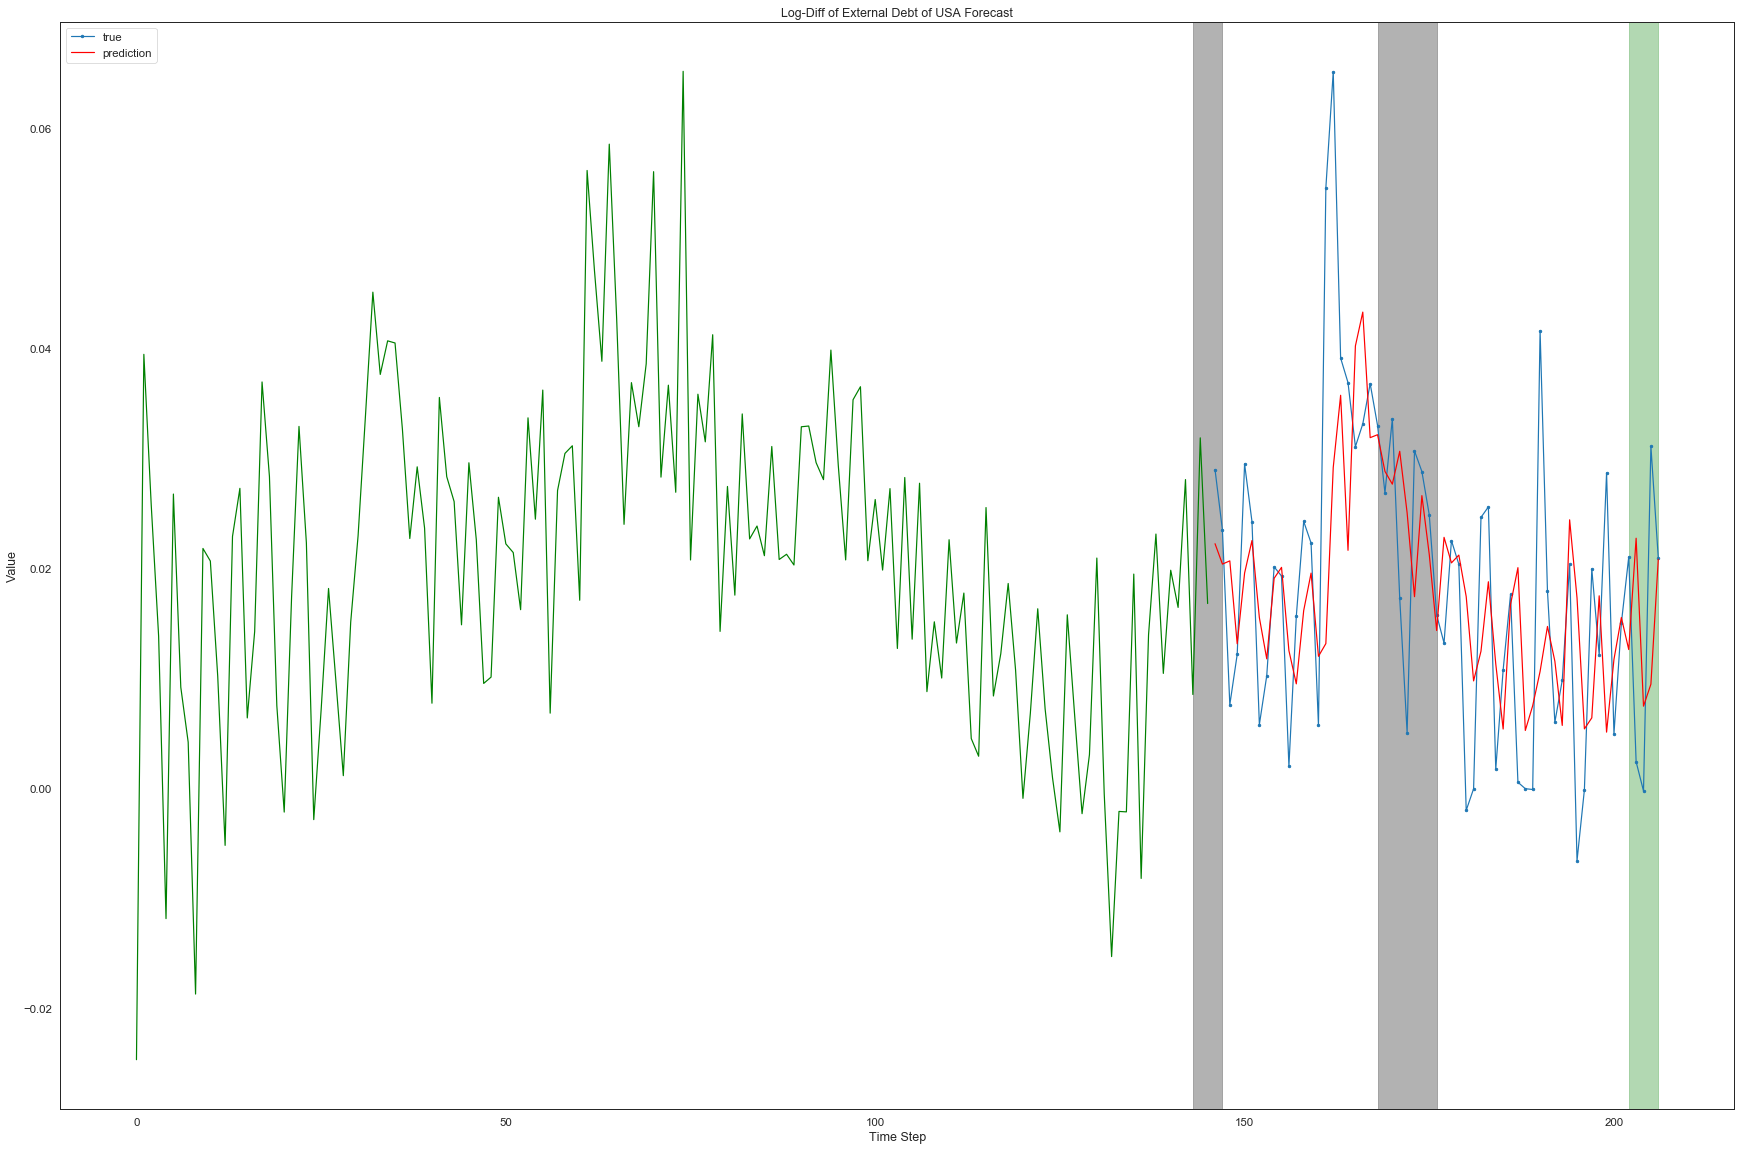

In [289]:
plt.figure(figsize=(30,20))

plt.plot(np.arange(0, len(y_train)), y_train, 'g')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('Log-Diff of External Debt of USA Forecast')
plt.axvspan(202, 206, alpha=0.3, color='green')
plt.axvspan(168, 176, alpha=0.3, color='black')
plt.axvspan(143, 147, alpha=0.3, color='black')



plt.legend()
plt.rcParams.update({'font.size': 30})

plt.show();

In [248]:
print(len(data))

215
